Creating Matches
----------------

One of the capabilities of the library is to create a match between two players. Players are implemented in
the library as `classes`. A list of all the implemented strategies in the library can be found here: http://axelrod.readthedocs.io/en/latest/reference/all_strategies.html

For now we are going to use two simple strategies to demonstrate how we create a `match`.
A match is often useful when designing new strategies in order to study how they perform against specific opponents.

So for example lets create a 5 turns match between `Cooperator()` and `Random()`. 

In [1]:
import axelrod as axl

In [2]:
axl.__version__

'4.0.0'

In [10]:
players = (axl.Cooperator(), axl.Defector())
match = axl.Match(players, turns=5)
results = match.play()
results

[(C, D), (C, D), (C, D), (C, D), (C, D)]

We can also obtain the score of the match.

In [11]:
scores = match.scores()
scores

[(0, 5), (0, 5), (0, 5), (0, 5), (0, 5)]

and various other measures.

In [12]:
match.final_score()

(0, 25)

In [13]:
match.final_score_per_turn()

(0.0, 5.0)

In [14]:
match.winner()

Defector

In [15]:
match.cooperation()  # The count of cooperations

(5, 0)

In [16]:
match.normalised_cooperation() 

(1.0, 0.0)

EXERCISE
--------
Use the `Match` class to create the following matches:
    
- 5 turns match Cooperator vs Defector 
- 10 turns match Tit For Tat vs Grumpy

In [23]:
players = (axl.TitForTat(), axl.Grumpy())
match = axl.Match(players, turns=10)
results = match.play()
results

[(C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C),
 (C, C)]

In [24]:
scores = match.scores()
scores

[(3, 3),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 3)]

In [28]:
#results = tournament.play()
winners = match.winner()
winners

False

Creating Tournaments
-----------------------

Remember the library was created to study the interactions between strategies in a round robin tournament. A tournament where each strategy play against all opponents and the strategy with the highest score is the winner of the tournament. Here we will cover how we can easily create a very simple IPD tournament.

Here we create a list of players. 


**Note:** A list and the documentation of all the implemended strategies can be found [here](http://axelrod.readthedocs.io/en/latest/reference/all_strategies.html).

In [19]:
players = [axl.Cooperator(), axl.Defector(), axl.Random(),
           axl.TitForTat(), axl.Grumpy(), axl.Alternator()]

We can now create a tournament, play it, save the results and view the rank of each player:

In [20]:
tournament = axl.Tournament(players=players)
tournament.turns # default value of turns

200

In [21]:
tournament.repetitions # default value of repititions

10

In [30]:
results = tournament.play()
winners = results.ranked_names
winners

Analysing: 100%|██████████| 25/25 [00:00<00:00, 51.27it/s]


['Defector',
 'Alternator',
 'Tit For Tat',
 'Grumpy: Nice, 10, -10',
 'Random: 0.5',
 'Cooperator']

In [31]:
scores = results.scores
scores

[[1839, 1791, 1818, 1815, 1809, 1770, 1794, 1812, 1782, 1809],
 [2636, 2672, 2664, 2644, 2668, 2664, 2676, 2648, 2660, 2636],
 [2307, 1930, 2185, 2555, 2558, 2019, 1999, 1971, 2064, 2563],
 [2345, 2322, 2321, 2335, 2343, 2358, 2342, 2325, 2318, 2347],
 [2089, 2259, 2141, 2034, 2013, 2214, 2219, 2217, 2149, 2000],
 [2615, 2673, 2648, 2664, 2677, 2705, 2680, 2651, 2612, 2633]]

We can also plot the results.

In [32]:
%matplotlib inline

/home/jon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


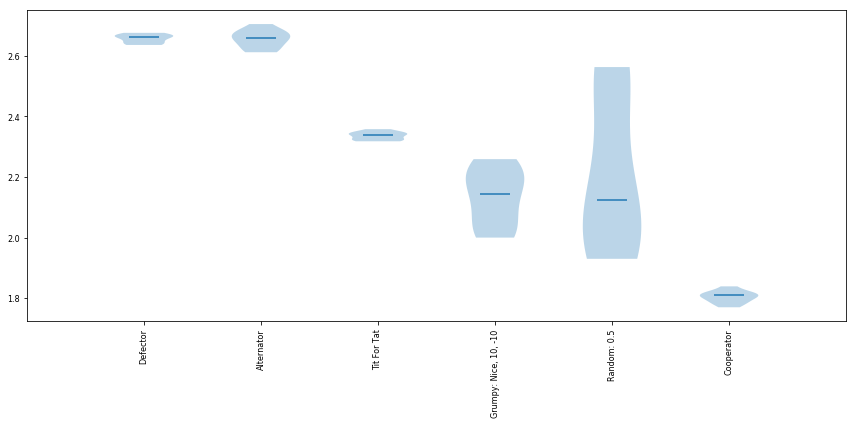

In [33]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

EXERCISE
--------

Create your own tournament using any five players from the library.

Futhermore, look at the ranked names and plot the scores.

Summary
--------

This section has discussed:

- Creating a match
- and creating various tournaments.

In the next section we will send some time looking at what is called the human strategy.